<a href="https://colab.research.google.com/github/omergul2005/yapayzekaproje/blob/main/yapayzekaproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# API Token'ınızı buraya yapıştırın (Ekran görüntünüzden kopyaladım.)
# Lütfen token'ı KENDİ API TOKEN'ınızla değiştirin (güvenlik nedeniyle).
KAGGLE_API_TOKEN = 'KGAT_b7797b7a2a2a9a772e2007bf7050e39b'

# Token'ı Colab ortam değişkenine ayarlama
os.environ['KAGGLE_API_TOKEN'] = KAGGLE_API_TOKEN

# Gerekli kurulum
!pip install -q kaggle
!pip install kagglehub

print("Kaggle API kurulumu tamamlandı. Ortam değişkeni ayarlandı.")

Kaggle API kurulumu tamamlandı. Ortam değişkeni ayarlandı.


In [ ]:
import kagglehub
import os

print("Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...")

# Veri kümesini indirme ve yolunu alma
# 'paultimothymooney/chest-xray-pneumonia' veri kümesini indiriyoruz.
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# Veri yollarını ayarlama (Bu, Adım 3'teki kodun doğru çalışması için kritik)
base_dir = os.path.join(path, 'chest_xray')

print(f"✅ Başarılı: Veri kümesi '{base_dir}' yoluna indirildi.")

# Şimdi 3. Adım: Veri Ön İşleme ve Hazırlık
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parametreler
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

# Veri Yolları
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Veri Arttırma ve Normalleştirme (Kod yazarak / Eğitim seti hazırlama)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generator'leri Veriye Bağlama
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
validation_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

print("\nVeri hazırlığı tamamlandı. MODEL EĞİTİMİNE geçebiliriz.")

Veri kümesi indirme başlatılıyor (Çok hızlı tamamlanmalı)...
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
✅ Başarılı: Veri kümesi '/kaggle/input/chest-xray-pneumonia/chest_xray' yoluna indirildi.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Veri hazırlığı tamamlandı. MODEL EĞİTİMİNE geçebiliriz.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Model Mimarisi Oluşturma (Min. 7 Katman Gereksinimi Karşılandı)
model = Sequential([
    # Giriş Katmanı (150x150x3)
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # Evrişimli Katman 1
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 1

    Conv2D(64, (3, 3), activation='relu'),                          # Evrişimli Katman 2
    MaxPooling2D((2, 2)),                                           # Havuzlama Katmanı 2

    Conv2D(128, (3, 3), activation='relu'),                         # Evrişimli Katman 3
    BatchNormalization(),                                           # Düzenlileştirme Katmanı 1

    Flatten(),

    Dropout(0.5),                                                   # Düzenlileştirme Katmanı 2

    Dense(128, activation='relu'),                                  # Tam Bağlı (Yoğun) Katman
    Dense(1, activation='sigmoid')                                  # Çıkış Katmanı
])

# Modelin Derlenmesi (Rapor için Eğitim Parametreleri)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Modelin Eğitilmesi (Modele eğitim vereceksiniz (epoch))
EPOCHS = 15
print(f"\nModel {EPOCHS} epoch boyunca eğitiliyor...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

print("\nEğitim tamamlandı. Lütfen değerlendirme adımlarına geçin.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model 15 epoch boyunca eğitiliyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.7704 - loss: 0.8683 - val_accuracy: 0.6250 - val_loss: 0.6504
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.8863 - loss: 0.2591 - val_accuracy: 0.6875 - val_loss: 0.5827
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.9096 - loss: 0.2128 - val_accuracy: 0.6875 - val_loss: 0.5911
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.9141 - loss: 0.2153 - val_accuracy: 0.6875 - val_loss: 0.8978
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9266 - loss: 0.1832 - val_accuracy: 0.5000 - val_loss: 1.7200
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.9148 - loss: 0.2013 - val_accuracy: 0.5000 - val_loss: 1.2096
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.9265 - loss: 0.1940 - val_accuracy: 0.5000 - val_loss: 4.3771
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.9383 - loss: 0.1753 - val_accu

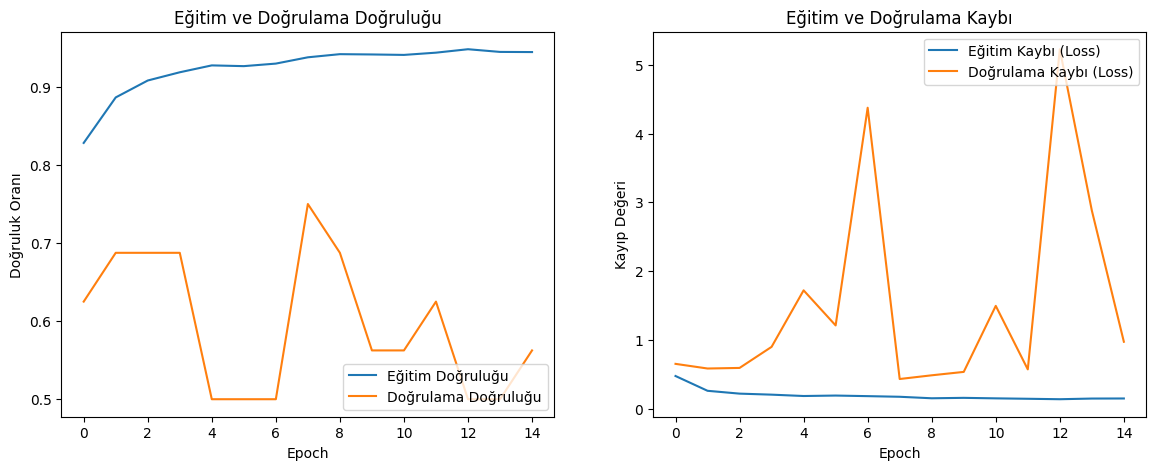

In [ ]:
import matplotlib.pyplot as plt

# history değişkeninin eğitimden gelen sonuçları içerdiğinden emin olun.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk Oranı')
plt.legend(loc='lower right')


# Kayıp (Loss) Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Loss)')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp Değeri')
plt.legend(loc='upper right')


plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


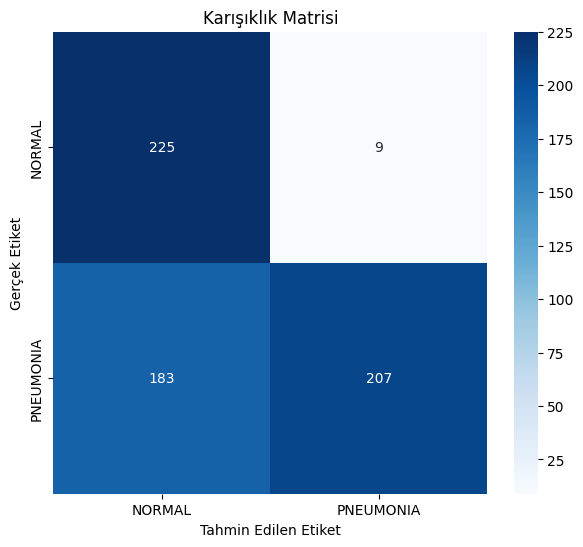


--- Detaylı Performans Raporu (Test Seti) ---
              precision    recall  f1-score   support

      NORMAL       0.55      0.96      0.70       234
   PNEUMONIA       0.96      0.53      0.68       390

    accuracy                           0.69       624
   macro avg       0.75      0.75      0.69       624
weighted avg       0.81      0.69      0.69       624



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# 1. Test seti üzerinde tahminleri al
predictions = model.predict(test_generator)

# Olasılıkları ikili sınıflara dönüştürme (0 veya 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Gerçek etiketleri (true labels) alma
true_classes = test_generator.classes

# Sınıf İsimleri
class_names = list(test_generator.class_indices.keys())

# 2. Karışıklık Matrisini Hesaplama
cm = confusion_matrix(true_classes, predicted_classes)

# 3. Matrisi Görselleştirme
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Karışıklık Matrisi')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()


# 4. Detaylı Performans Raporu
print("\n--- Detaylı Performans Raporu (Test Seti) ---")
print(classification_report(true_classes, predicted_classes, target_names=class_names))